Random Forest Classifier

Importing the required packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the data set

In [ ]:
train_data = pd.read_csv("BBC News Train.csv")
test_data = pd.read_csv("BBC News Test.csv")
test_solution_data = pd.read_csv("BBC News Sample Solution.csv")

Exploring the train data

In [ ]:
train_data.shape

(1490, 3)

In [ ]:
train_data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


Here the variable "Text" is the data by which we are going to predict the Category.

In [ ]:
print(train_data.columns)
print(train_data['Category'].value_counts())

Index(['ArticleId', 'Text', 'Category'], dtype='object')
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64


Checking the different category types and distribution

In [ ]:
train_data['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

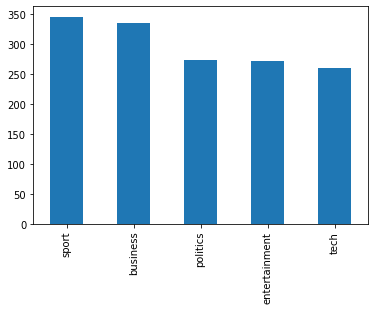

In [ ]:
train_data['Category'].value_counts().plot(kind='bar')
plt.show()

We have a total of 5 different category where all the text corresponds to.

Let's try to clean the "Text" data by removing special characters and blank spaces and have only the words which are in English language.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
import nltk
import re

Trying to remove the non-english words from the Text data.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Filtering the special characters, spaces and non english words from the text data.

In [ ]:
stop_words = set(stopwords.words('english'))

for index, row in train_data.iterrows():
    if type(row['Text']) is str:
        if type(row['Text']) is not int:
            string = ""

            # replacing special char with blank space
            row['Text'] = re.sub('[^a-zA-Z0-9\n]', ' ', row['Text'])
            # removing blank spaces
            row['Text'] = re.sub('\s+', ' ', row['Text'])
            # converting all the words to lower case
            row['Text'] = row['Text'].lower()

            for x in row['Text'].split():
                # if it is an english word add it to the data
                if not x in stop_words:
                    string += x + " "
            train_data['Text'][index] = string




Let's first split the train data into train and test and validate initially.

In [ ]:
from sklearn.model_selection import train_test_split
X_train = train_data.drop(['ArticleId','Category'], axis=1)
# X_train.head()
y_train = train_data['Category']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)

print(X_train.shape)
print(X_test.shape)

(1192, 1)
(298, 1)


ONE HOT encoding

To convert the text into numerical data using the one hot encoder to load it into the machine learning model.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text_vectorizer = CountVectorizer(min_df=3)
train_text_ohe = text_vectorizer.fit_transform(X_train['Text'])

In [ ]:
from sklearn.preprocessing import normalize

train_text_ohe = normalize(train_text_ohe, axis=0)

test_text_ohe = text_vectorizer.transform(X_test['Text'])

test_text_ohe = normalize(test_text_ohe, axis=0)

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
clf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=5, random_state=1234, n_jobs=-1)

In [ ]:
model = clf.fit(train_text_ohe, y_train)

rf_clf = CalibratedClassifierCV(clf, method='sigmoid')
rf_clf.fit(train_text_ohe, y_train)

sig_clf_prob = rf_clf.predict_proba(train_text_ohe)

predict_y = rf_clf.predict_proba(train_text_ohe)
predict_y_test = rf_clf.predict_proba(test_text_ohe)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [ ]:
print(log_loss(y_train, predict_y, labels=clf.classes_))
print(log_loss(y_test, predict_y_test, labels=clf.classes_))
train_acc = (rf_clf.score(train_text_ohe, y_train)*100)
test_acc = (rf_clf.score(test_text_ohe, y_test)*100)
print(train_acc)
print(test_acc)


0.1221618819990442
0.2008759184584552
98.40604026845638
95.63758389261746


Test data

In [ ]:
# test_data = pd.read_csv("BBC News Test.csv")

Cleaning the test data to remove blank spaces and special characters

In [ ]:
for index, row in test_data.iterrows():
    if type(row['Text']) is str:
        if type(row['Text']) is not int:
            string = ""

            # replacing special char with blank space
            row['Text'] = re.sub('[^a-zA-Z0-9\n]', ' ', row['Text'])
            # removing blank spaces
            row['Text'] = re.sub('\s+', ' ', row['Text'])
            # converting all the words to lower case
            row['Text'] = row['Text'].lower()

            for x in row['Text'].split():
                # if it is an english word add it to the data
                if not x in stop_words:
                    string += x + " "
            test_data['Text'][index] = string

One hot encoder for the test data

In [ ]:
test_text_ohe = text_vectorizer.transform(test_data['Text'])
test_text_ohe = normalize(test_text_ohe, axis=0)

Calculating the log loss for the test data.

In [ ]:
test_final_ohe = rf_clf.predict_proba(test_text_ohe)

In [ ]:
print(log_loss(test_solution_data['Category'], test_final_ohe, labels=clf.classes_))

3.854990723081456


Making the prediction on the new test data on the random forest classification model

In [ ]:
test = rf_clf.predict(test_text_ohe)

Assigining the predicted data to a new column in the test data frame.

In [ ]:
test_data['Pred_cat'] = test

In [ ]:
test_data.head()

,ArticleId,Text,Pred_cat
0,1018,qpr keeper day heads preston queens park range...,sport
1,1319,software watching work software monitor every ...,tech
2,1138,arcy injury adds ireland woe gordon arcy ruled...,sport
3,459,india reliance family feud heats ongoing publi...,business
4,1020,boro suffer morrison injury blow middlesbrough...,sport


Let's explore the predicted data with the solution data.

In [ ]:
test_solution_data['Category'].value_counts()

sport            147
tech             147
business         147
entertainment    147
politics         147
Name: Category, dtype: int64

In [ ]:
test_data['Pred_cat'].value_counts()

business         177
sport            173
politics         143
tech             127
entertainment    115
Name: Pred_cat, dtype: int64

We have some prediction mistakes as the value counts in the predicted is not equal to that of the actual data.

Let's calcualte the mean absolute error to find the prediction precision.

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
test_data['Pred_cat'].factorize

<bound method IndexOpsMixin.factorize of 0              sport
1               tech
2              sport
3           business
4              sport
           ...      
730         business
731    entertainment
732         politics
733         business
734         politics
Name: Pred_cat, Length: 735, dtype: object>

Creating a new dictonary to map each category value to a value.

In [ ]:
new_df = { 'business':0, 'tech' : 1, 'politics':2, 'sport':3, 'entertainment':4}

Creating a new column to map the category value to that of the value in the dict.

In [ ]:
test_data['Pred_cat_num'] = test_data['Pred_cat'].apply(lambda x: new_df.get(x))

Let's merge the predicted and the solution data frames

In [ ]:
complete_data = pd.merge(test_data, test_solution_data, how='left', left_on='ArticleId', right_on='ArticleId')

In [ ]:
complete_data['actual_cat_num'] = complete_data['Category'].apply(lambda x: new_df.get(x))

In [ ]:
complete_data.head()

,ArticleId,Text,Pred_cat,Pred_cat_num,Category,actual_cat_num
0,1018,qpr keeper day heads preston queens park range...,sport,3,sport,3
1,1319,software watching work software monitor every ...,tech,1,tech,1
2,1138,arcy injury adds ireland woe gordon arcy ruled...,sport,3,business,0
3,459,india reliance family feud heats ongoing publi...,business,0,entertainment,4
4,1020,boro suffer morrison injury blow middlesbrough...,sport,3,politics,2


Mean absolute error calculation

In [ ]:
e = mean_absolute_error(complete_data['actual_cat_num'], complete_data['Pred_cat_num'])

print(f"{e:} average error for the Random Forest Classifier model on the test data")

1.635374149659864 average error for the Random Forest Classifier model on the test data


Looks like on an average error for our Random Forest Classifier model is 1.63

Manual Error calculation for the predicted value

The accuracy value for the train and test data found from the machine learning model is below



In [ ]:
print(train_acc)
print(test_acc)


98.40604026845638
95.63758389261746


Let's get the predicted value for the train and test set.

In [ ]:
train_p = rf_clf.predict(train_text_ohe)
test_p = rf_clf.predict(test_text_ohe)

Fetching the unique category names.

In [ ]:
gg = pd.Series(new_df.keys())
# gg[0]

Let's create a confusion matrix and find the True Positive, False Positive and False Negative information.

In [ ]:
# Creating a confusion matrix to calculate the accuracy mathematically
TP = 0 # True Positive 
FP = 0 # False Positive
TN = 0 # True Negative
FN = 0 # False Negative
for g in gg:    
    for x,y in zip(y_train, train_p):
        # print(x,y)
        if (x==g) & (g == y):
            TP += 1
        elif (x!=g) & (g!= y):
            TN += 1
        elif (x==g) & (g!=y):
            FP += 1
        else:
            FN += 1
            

The confusion matrix is created with the corresponding information obtained from the function above.

This function literally checks each category value with the predicted and the actual output and finds if it is really the right output or something wrong with the predicted value.

The precision (accuracy) of the model is calculated by the formula 

accuracy = TP / (TP + FP)

The recall value is calculated using the below formula.

recall = TP / (TP + FN)

The F1 score for the model can be calculated by the below formula.

F1_score = 2* ((accuracy * recall) / (accuracy + recall))

TP -> True Positive

TN -> True Negative

FP -> False Positive

FN -> False Negative

In [ ]:
acc = TP/ (TP+FP)
recall = TP/(TP+FN)
F1_score = 2*((acc*recall) / (acc + recall))

In [ ]:
# print(TP, FP, TN, FN)
print("Manually calculated accuracy:", acc) # Accuracy
print("Manually calculated recall:", recall) # Recall
print("Manually calculated F1_score:", F1_score) # F1 Score

Manually calculated accuracy: 0.9840604026845637
Manually calculated recall: 0.9840604026845637
Manually calculated F1_score: 0.9840604026845637


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c09ee406-7f7f-485e-99d5-d59670a0e3a8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>